# Project 2
## Investigate a Dataset
### What factors made people more likely to survive from thge Titanic Disaster? 

I choose to analyze the tatanic data, through My anaysis, I wnat to answer the question: What factors made people more likely to survive?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('ggplot')

In [2]:
# read the cvs file
filename = 'titanic-data.csv'
titanic = pd.read_csv(filename)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Concise summary of titanic_data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From the summary, there are 12 varivales in the data, and the column Cabin has almost 700 missing values, so I will delete them from the whole data frame beacuse this column is useless for the anlysis. What's more, for the column Age and Embarked, they have 177 and 2 missing values separately. When I anylyze these two fators, I'd like to drop the missing values from them. 

In [4]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:
# the basic statistics of the data frame after deleting the column Cabin
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Form above table, the most important information we could know is the survival rate of 891 passengers is 38.38%

Before the start of fators anallysis, I'd like to see the distribution of fares.

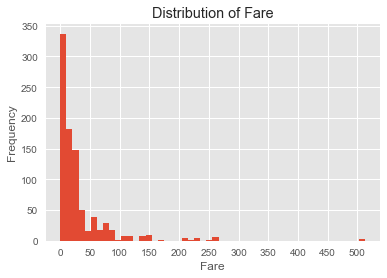

In [6]:
# Histogram of frae distribution
ax1 = titanic['Fare'].hist(bins=50 )
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Fare")
ax1.set_xticks(range(0, 550, 50))
plt.title('Distribution of Fare')
plt.show()

We can find that most passengers spent less than $50 on this titannic trip, but threr are a few people who spent more $500. It's really a hug gap. 

## Analyze the survival rate by some factors
#### First, I choose five factors: Age, Pclass, Sex, SibSP and Parch.

I will visilize the age distribution of survivals and unsrvivals.

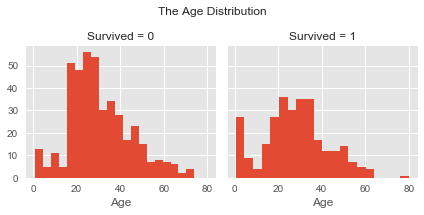

In [7]:
titanic_dropMissingAge = titanic.dropna(subset=['Age']) #drop all the rows that Age is NaN
g = sns.FacetGrid(titanic_dropMissingAge, col='Survived')
g.map(plt.hist,'Age', bins=20)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('The Age Distribution')

From the above graphs, we can find that most passengers's ages are between 20-40, they are also the most part of sruvivals or unservivals. However, we cannot conclude if age affect the survival rates, because the survival/unsurvival rates connot be observed from histograms. And then I want to analyze the survival rates of different ages groups.

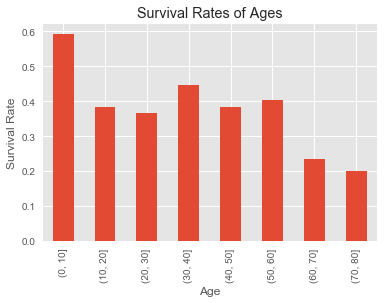

In [8]:
#  split the ages in group
survival_rate_AgeGroups = titanic_dropMissingAge[['Age', 'Survived']].groupby(
    pd.cut(titanic_dropMissingAge['Age'], range(0,81, 10)))['Survived'].mean()
ax2 = survival_rate_AgeGroups.plot(kind='bar', title='Survival Rates of Ages')
ax2.set_ylabel('Survival Rate')

From the result, we cannot find that children(age 0-10) have the survival rate, but passengers whose age is higher than 60-year-old only have about 20% survival rate. 

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


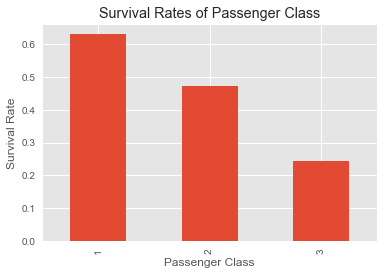

In [9]:
# Pclass: Passenger Class
survival_rate_Pclass = titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean()
print (survival_rate_Pclass.sort_values(by='Survived', ascending=False))
ax3 = survival_rate_Pclass.plot.bar(title='Survival Rates of Passenger Class', legend=False)
ax3.set_ylabel("Survival Rate")
ax3.set_xlabel("Passenger Class")

The result is obvious, the higher class, the higer survival rate. The first class's survival rate is about 2.6 times that of third class.

        Survived
Sex             
female  0.742038
male    0.188908


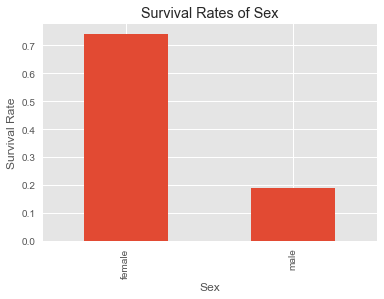

In [10]:
survival_rate_Sex = titanic[['Sex', 'Survived']].groupby(['Sex']).mean()
print (survival_rate_Sex.sort_values(by='Survived', ascending=False))
ax4 = survival_rate_Sex.plot.bar(title='Survival Rates of Sex', legend=False)
ax4.set_ylabel("Survival Rate")

Form the result, we could is the survival rate of female is far higher than that of the male, I think the reason maybe is the women and children is saved first when the accident happened. 

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000


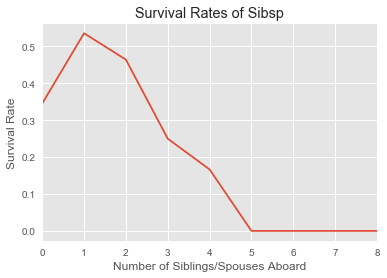

In [11]:
# Sibsp: Number of Siblings/Spouses Aboard
survival_rate_SibSp = titanic[['SibSp', 'Survived']].groupby(['SibSp']).mean()
print (survival_rate_SibSp.sort_values(by='Survived', ascending=False))
ax5 = survival_rate_SibSp.plot(title='Survival Rates of Sibsp', legend=False)
ax5.set_ylabel("Survival Rate")
ax5.set_xlabel("Number of Siblings/Spouses Aboard")

From the analysis of sibsp, we can see that people has only one sibling/spouse has more than half the chance to surve, and the probability to survive is close to 50% for those people who has two siblings/spouses. 

       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


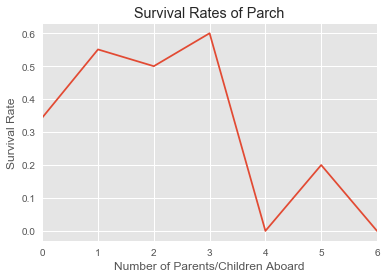

In [12]:
# Parch: Number of Parents/Children Aboard
survival_rate_Parch = titanic[['Parch', 'Survived']].groupby(['Parch']).mean()
print (survival_rate_Parch.sort_values(by='Survived', ascending=False))
ax6 = survival_rate_Parch.plot(title='Survival Rates of Parch', legend=False)
ax6.set_ylabel("Survival Rate")
ax6.set_xlabel("Number of Parents/Children Aboard")

As the result shows, people who has 1-3 carents/children has more 50% to survive. 

#### Also, Embarked is considerable.
I will visulize this factor to see if it affect the suvival rate and I will drop the missing values of Embarked first.

             Survived
Cherbourg    0.553571
Queenstown   0.389610
Southampton  0.336957


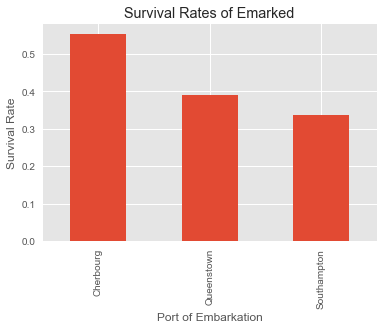

In [13]:
# Emarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
titanic_dropMissingEmbarked = titanic.dropna(subset=['Embarked']) #drop all the rows that Age is NaN
survival_rate_Embarked = titanic_dropMissingEmbarked[['Embarked', 'Survived']].groupby(['Embarked']).mean()
survival_rate_Embarked.index = ['Cherbourg', 'Queenstown', 'Southampton']
print (survival_rate_Embarked.sort_values(by='Survived', ascending=False))
ax7 = survival_rate_Embarked.plot.bar(title='Survival Rates of Emarked',legend=False)
ax7.set_ylabel("Survival Rate")
ax7.set_xlabel("Port of Embarkation")
plt.show()

According to the three pointplots, the passengers who embarked at Cherbourg hae the highest survival rate of these three ports.

## Conclusion 
From the above analysis, it seems like that many factors would afftect the survival rates includings ages, Age, Pclass, Sex, SibSP, Parch and Embarked. In general, the female, the first class passengers, passengers with one sibling/spouse or three parents/children and those who embarked at Cherbourg has the highest survival chance. However, there are some limitations to my analysis. First, I don't anylyze the corraltions between these factors, for example, maybe the female in the first class has the higest survival rate on the whole titanic, through the caorralation, we can make conclusion more precisely. Second, the way I handle missing values, for example, I delete the whole column Cabin, it might be easy, but this factor has been totally ignore. Third, I don't discuss the other variables that not included in the data, for example, the career of the passenger maybe is a good view to analyze. 

## Refernce
https://www.kaggle.com/c/titanic/data